In [41]:
import numpy as np


In [42]:
data=np.loadtxt("data.csv",delimiter=",")
data.shape


(100, 2)

In [43]:
x=data[:,0].reshape(-1,1)
y=data[:,1]

In [44]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(x,y)

In [45]:
from sklearn.linear_model import LinearRegression
algo=LinearRegression()

algo.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
algo.coef_

array([1.31232122])

In [47]:
algo.intercept_

8.952932675530377

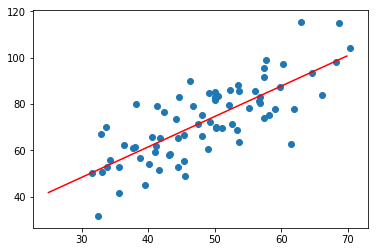

In [48]:
import matplotlib.pyplot as plt
m=algo.coef_[0]
c=algo.intercept_

x_line=np.arange(25,70,0.1)
y_line=m*x_line+c
plt.plot(x_line,y_line,"r")
X_1d=X_train.reshape(75)
plt.scatter(X_1d,Y_train)
plt.show()


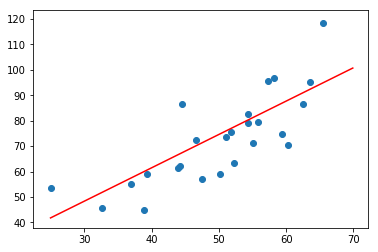

In [49]:
import matplotlib.pyplot as plt
m=algo.coef_[0]
c=algo.intercept_

x_line=np.arange(25,70,0.1)
y_line=m*x_line+c
plt.plot(x_line,y_line,"r")
X_1d=X_test.reshape(25)
plt.scatter(X_1d,Y_test)
plt.show()


In [51]:
score_test=algo.score(X_test,Y_test)
score_training=algo.score(X_train,Y_train)
score_test,score_training

(0.6069354340457731, 0.5944545067644016)

### LinearRegressionFromScratch ###

In [81]:
import numpy as np

In [82]:
data=np.loadtxt("data.csv",delimiter=",")

In [83]:
x=data[:,0]
y=data[:,1]

In [84]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(x,y,test_size=0.3)

In [87]:
def fit(x_train,y_train):
    num=(x_train*y_train).mean()-x_train.mean()*y_train.mean()
    den=(x_train**2).mean()-x_train.mean()**2
    m=num/den
    c=y_train.mean()-m*x_train.mean()
    return m,c

In [96]:
def predict(x,m,c):
    return m * x + c

def score(y_truth,y_pred):
    u=((y_truth-y_pred)**2).sum()
    v=((y_truth-y_truth.mean())**2).sum()
    return 1-u/v

def cost(x,y,m,c):
    return ((y-m*x -c)**2).mean()

In [97]:
m,c=fit(X_train,Y_train)
print(m.shape)
c.shape

#test_data
y_test_pred=predict(X_test,m,c)
print("Test score:",score(Y_test,y_test_pred))

#train_data
y_train_pred=predict(X_train,m,c)
print("Train score:",score(Y_train,y_train_pred))

print("Cost on training data",cost(X_train,Y_train,m,c))


print("M,C :",m,c)

()
Test score: 0.7608048735402213
Train score: 0.5099699416642526
Cost on training data 127.66008087195823
M,C : 1.2732777124763697 11.22926264514841
